<h1>Regression and raw_house_data</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h4>Importing dataset</h4>

In [2]:
df = pd.read_csv('C:/Users/rishd/OneDrive/Desktop/Data Cleaning DS/Regression/raw_house_data.csv')
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [4]:
df.shape

(5000, 16)

In [5]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000


<h4>Handling missing values</h4>

In [6]:
#check missing values
df.isnull().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64

In [7]:
#handle missing values 
df['lot_acres'] = df['lot_acres'].fillna(df['lot_acres'].median())
df['sqrt_ft'] = df['sqrt_ft'].fillna(df['sqrt_ft'].median())
df['bathrooms'] = df['bathrooms'].fillna(0)
df['garage'] = df['garage'].fillna(0)
df['kitchen_features'] = df['kitchen_features'].fillna(df['kitchen_features'].mode()[0])
df['floor_covering'] = df['floor_covering'].fillna(df['floor_covering'].mode()[0])
df['HOA'] = df['HOA'].fillna(0)

In [8]:
df.isnull().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

<h4>Feature Transformations</h4>

In [9]:
#convert fireplaces and HOA to integer
df['fireplaces'] = pd.to_numeric(df['fireplaces'], errors='coerce')
df['HOA'] = pd.to_numeric(df['HOA'], errors='coerce')
df['fireplaces'] = df['fireplaces'].fillna(0).astype(int)
df['HOA'] = df['HOA'].fillna(0).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         5000 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   float64
 10  sqrt_ft           5000 non-null   float64
 11  garage            5000 non-null   float64
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   int64  
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   int64  
dtypes: float64(8), int64(6), object(2)
memory 

In [11]:
#count kitchen features
df['kitchen_features'] = df['kitchen_features'].fillna("").astype(str).str.split(',')
df['kitchen_features'] = df['kitchen_features'].apply(lambda lst: [x.strip() for x in lst if x.strip()])
df['kitchen_features_count'] = df['kitchen_features'].str.len()
df['kitchen_features_count'].head()

0    4
1    2
2    3
3    4
4    5
Name: kitchen_features_count, dtype: int64

In [12]:
#count floor covering
df['floor_covering'] = df['floor_covering'].fillna("").astype(str).str.split(',')
df['floor_covering'] = df['floor_covering'].apply(lambda lst: [x.strip() for x in lst if x.strip()])
df['floor_covering_count'] = df['floor_covering'].str.len()
df['floor_covering_count'].head()

0    2
1    2
2    2
3    3
4    2
Name: floor_covering_count, dtype: int64

In [13]:
#combining bedrooms and bathrooms into a new column rooms
df['rooms'] = df['bedrooms'] + df['bathrooms']
df['rooms'] = df['rooms'].fillna(0).astype(int)
df['rooms'].head()

0    23
1     4
2     5
3    12
4    10
Name: rooms, dtype: int64

In [14]:
#creating new column price per square feet
df['price_sqft'] = df['sold_price']/df['sqrt_ft']
df['price_sqft'] = round(df['price_sqft'],2)
df['price_sqft'].head()

0     504.76
1     575.34
2    1195.90
3     498.95
4     533.37
Name: price_sqft, dtype: float64

<h4>Log Transformation to Handle Outliers</h4>

In [15]:
#calculating z-score to count outliers in features
numeric_cols = ['sold_price','sqrt_ft','taxes','lot_acres','HOA','rooms','garage','fireplaces']
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())

# Identify outliers (commonly z > 3)
outliers = (z_scores > 3)
print(outliers.sum())  # how many outliers per column

sold_price    98
sqrt_ft       66
taxes          2
lot_acres     15
HOA           68
rooms         19
garage        45
fireplaces    30
dtype: int64


In [16]:
# Check skewness
skewness = df[numeric_cols].skew()
print(skewness)

sold_price     3.794414
sqrt_ft        3.548490
taxes         70.366938
lot_acres     31.453657
HOA            2.307445
rooms         12.235863
garage         4.888009
fireplaces     0.913490
dtype: float64


In [17]:
#columns with skew > 1 are log transformed
skewed_cols = skewness[skewness > 1].index  # columns with high positive skew

for col in skewed_cols:
    df[col + '_log'] = np.log1p(df[col])

In [18]:
df[['sold_price','sold_price_log']].head()

,sold_price,sold_price_log
0,5300000.0,15.483218
1,4200000.0,15.250595
2,4200000.0,15.250595
3,4500000.0,15.319588
4,3411450.0,15.042648


<h4>Using KNN Classifier model to predict price_sqft based on Latitude and Longitude</h4>

In [19]:
#get a new feature Category or cat which groups price per square foot based on location 
#fit KNN classifier with inputs latitude and longitude and predict category that is derived from price per square foot 

In [20]:
df1 = df[['latitude','longitude','price_sqft']].copy()
df1.head()

,latitude,longitude,price_sqft
0,31.356362,-110.378200,504.76
1,31.594213,-111.045371,575.34
2,31.594844,-111.040707,1195.90
3,31.645878,-111.035925,498.95
4,32.285162,-110.813768,533.37


In [21]:
#create a column category that makes price_sqft data more symmetrical

In [22]:
def price_sqft_bin(x):
    return x // 50
    

In [23]:
df1['cat']=price_sqft_bin(df1['price_sqft'])

In [24]:
df1['cat'] = df1['cat'].fillna(0).astype(int)
df1['cat'].head()

0    10
1    11
2    23
3     9
4    10
Name: cat, dtype: int64

In [25]:
y = df1['cat'].to_numpy()
y

array([10, 11, 23, ...,  5,  2,  2])

In [26]:
set(y)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(23),
 np.int64(24)}

In [27]:
y.shape

(5000,)

In [28]:
X = df1[['latitude','longitude']].to_numpy()
X

array([[  31.356362, -110.3782  ],
       [  31.594213, -111.045371],
       [  31.594844, -111.040707],
       ...,
       [  32.964708, -110.755428],
       [  32.296871, -111.055528],
       [  31.385259, -110.913054]])

In [29]:
X.shape

(5000, 2)

In [30]:
from scipy.stats import multivariate_normal as mvn

class KNNClassifier():
    
    def fit(self,X,y):
        self.X = X
        self.y = y 

        
    def predict(self,X,K,epsilon=1e-8):
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2,axis=1)      #not taking sqrt cz it is a slow process
            idxt = np.argsort(dist2)[:K]             #returns sorted indices of nearest neighbors
            gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
            
            y_hat[i] = np.bincount(self.y[idxt],weights=gamma_k).argmax()

        return y_hat

In [31]:
knn_location =  KNNClassifier()
knn_location.fit(X,y)

In [32]:
y_hat = knn_location.predict(X,K=10)

In [33]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

<h4>KNN model evaluation</h4>

In [34]:
accuracy(y,y_hat)

np.float64(0.959)

In [35]:
X_test = [[31.59421,-111.045]]

In [36]:
y_test = knn_location.predict(X_test,K=10)

In [37]:
y_test

array([11.])

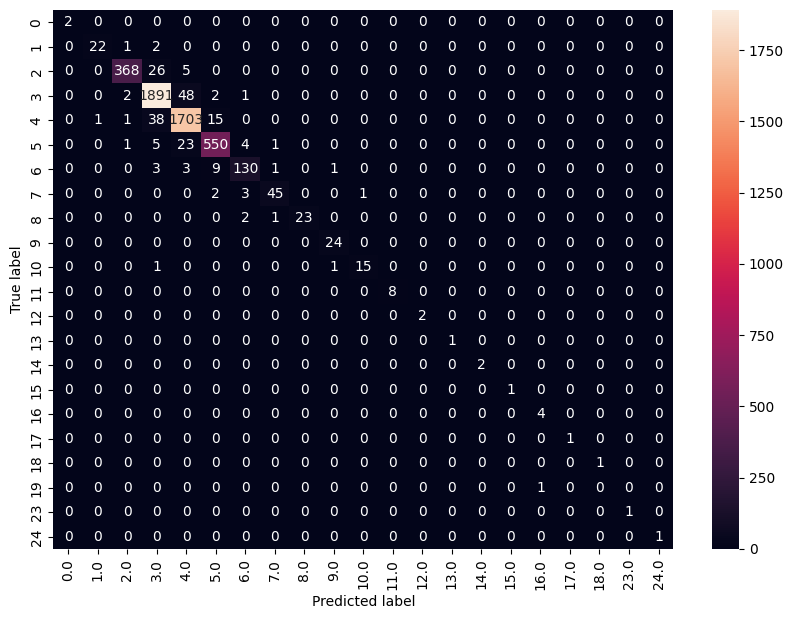

In [38]:
#confusion matrix
def ConfusionMatrix(y_actual,y_predicted):
  plt.figure(figsize=(10,7))
  y_actu = pd.Series(y_actual, name='Actual')
  y_pred = pd.Series(y_predicted, name='Predicted')
  cm = pd.crosstab(y_actu, y_pred)
  ax = sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


ConfusionMatrix(y,y_hat)

<h4>Predicting Sold_price using Multivariate Linear Regression</h4>

In [39]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA',
       'kitchen_features_count', 'floor_covering_count', 'rooms', 'price_sqft',
       'sold_price_log', 'sqrt_ft_log', 'taxes_log', 'lot_acres_log',
       'HOA_log', 'rooms_log', 'garage_log'],
      dtype='object')

In [40]:
#log transformed columns considered to improve regression model R2 value
df_new = df[['sold_price_log','lot_acres_log','taxes_log','sqrt_ft_log','garage_log','fireplaces','HOA_log','kitchen_features_count','floor_covering_count','rooms_log']].copy()

In [41]:
numeric_df = df_new.select_dtypes(include='number')

In [42]:
#columns that have high correlation with sold-price considered
numeric_df.corr()['sold_price_log'].sort_values(ascending=False)

sold_price_log            1.000000
sqrt_ft_log               0.569737
fireplaces                0.413949
rooms_log                 0.345799
taxes_log                 0.255823
HOA_log                   0.175512
lot_acres_log             0.172934
garage_log                0.120635
floor_covering_count      0.071482
kitchen_features_count    0.049393
Name: sold_price_log, dtype: float64

<h4>Output of knn model to be considered as one of the features given as input to the Regression model</h4>

In [43]:
df_new['knn_cat'] = knn_location.predict(X,K=10)
df_new.head()

,sold_price_log,lot_acres_log,taxes_log,sqrt_ft_log,garage_log,fireplaces,HOA_log,kitchen_features_count,floor_covering_count,rooms_log,knn_cat
0,15.483218,7.675546,8.570355,9.259226,0.000000,6,0.000000,4,2,3.178054,10.0
1,15.250595,7.443078,9.251805,8.895767,0.000000,5,0.000000,2,2,1.609438,11.0
2,15.250595,7.443078,9.257510,8.164226,0.000000,5,0.000000,3,2,1.791759,23.0
3,15.319588,6.457821,9.038315,9.107200,1.609438,4,0.000000,4,3,2.564949,9.0
4,15.042648,1.437463,9.641733,8.763584,1.386294,5,4.025352,5,2,2.397895,10.0


In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sold_price_log          5000 non-null   float64
 1   lot_acres_log           5000 non-null   float64
 2   taxes_log               5000 non-null   float64
 3   sqrt_ft_log             5000 non-null   float64
 4   garage_log              5000 non-null   float64
 5   fireplaces              5000 non-null   int64  
 6   HOA_log                 5000 non-null   float64
 7   kitchen_features_count  5000 non-null   int64  
 8   floor_covering_count    5000 non-null   int64  
 9   rooms_log               5000 non-null   float64
 10  knn_cat                 5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 429.8 KB


In [45]:
X = df_new.to_numpy()

In [46]:
y = X[:,0]
X = X[:,1:]

In [47]:
y

array([15.48321757, 15.25059532, 15.25059532, ..., 13.07107219,
       13.21767538, 13.01700508])

In [48]:
X

array([[ 7.675546  ,  8.57035474,  9.25922577, ...,  2.        ,
         3.17805383, 10.        ],
       [ 7.44307837,  9.25180472,  8.8957666 , ...,  2.        ,
         1.60943791, 11.        ],
       [ 7.44307837,  9.25751018,  8.16422565, ...,  2.        ,
         1.79175947, 23.        ],
       ...,
       [ 2.56955412,  6.90875478,  7.48042831, ...,  1.        ,
         1.79175947,  5.        ],
       [ 0.69813472,  8.66973057,  8.22282213, ...,  2.        ,
         2.19722458,  2.        ],
       [ 1.64093658,  7.94288804,  8.37054761, ...,  2.        ,
         2.19722458,  2.        ]])

In [49]:
#scaling the X and y using mean and std scaling for better results
X_scaled = (X - X.mean()) / X.std()

In [50]:
y_scaled = (y - y.mean()) / y.std()

<h4>Multivariate Linear Regression with Gradient Descent</h4>

In [51]:
def MAE(Y, Y_hat):
    return np.sum(np.abs((Y-Y_hat)))/len(Y)

def R2(Y,Y_hat):
    N=len(Y)
    return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y, Y_hat,N):
    #N = Y_hat.shape[0]
    return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [52]:
class MVLinearRegression():

  def fit(self, X, y, eta=1e-3, epochs = 1e3, show_curve= True):

    epochs=int(epochs)
    N, D = X.shape
    Y=y

    #Begin Optimization with SDg
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)
    # Start Gradient Descent Progression
    for epoch in range(epochs):

      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y, Y_hat, N)

      #weights update rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
C:\Users\rishd\AppData\Local\Temp\ipykernel_26172\4288822545.py:25: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{J}$")


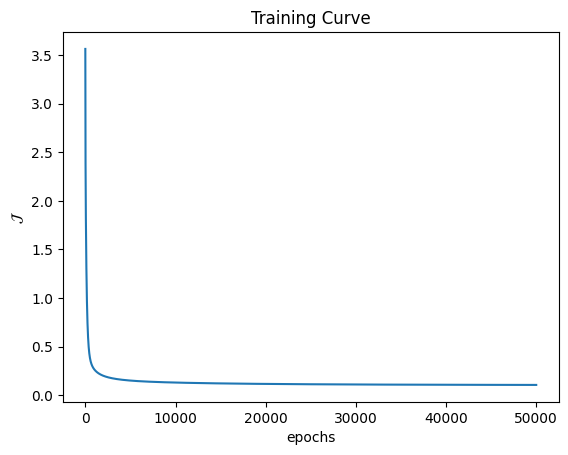

In [54]:
#tuning learning rate and epochs for a smoother training curve
my_reg = MVLinearRegression()
my_reg.fit(X_scaled,y_scaled,eta=5e-3,epochs=5e4)

#my_reg.fit(X_scaled,y_scaled,eta=5e-4,epochs=5e3)
#my_reg.fit(X_scaled,y_scaled,eta=1e-3,epochs=1e3)
#my_reg.fit(X,y_scaled,eta=1e-2,epochs=5e3)
#my_reg.fit(X_scaled,y_scaled,eta=1e-2,epochs=3e3)
#my_reg.fit(X_scaled,y_scaled,eta=1e-2,epochs=8e3)


In [56]:
y_hat = my_reg.predict(X_scaled)

In [58]:
loss = OLS(y_scaled,y_hat,5000)
loss

np.float64(0.10459796110305629)

<h4>Regression Model Evaluation</h4>

In [59]:
#Mean Absolute Error
error = MAE(y_scaled,y_hat)
error

np.float64(0.34212630070238703)

In [60]:
#R-sqaured value 
r2 = R2(y_scaled,y_hat)
r2

np.float64(0.7191573647762338)

In [61]:
df_new.columns

Index(['sold_price_log', 'lot_acres_log', 'taxes_log', 'sqrt_ft_log',
       'garage_log', 'fireplaces', 'HOA_log', 'kitchen_features_count',
       'floor_covering_count', 'rooms_log', 'knn_cat'],
      dtype='object')

<h4>Predict House price from a given set of features</h4>

In [62]:
def inference_function(lat,long,new_house,model,knn_location):


    knn_value = knn_location.predict([[lat,long]],K=10)[0]
    
    new_house['knn_cat'] = knn_value
    
    X_new = pd.DataFrame([new_house])
    
    #apply log transformations
    X_new['sqrt_ft_log'] = np.log1p(X_new['sqrt_ft'])
    X_new['rooms_log'] = np.log1p(X_new['rooms'])
    X_new['garage_log'] = np.log1p(X_new['garage'])
    X_new['HOA_log'] = np.log1p(X_new['HOA'])
    X_new['taxes_log'] = np.log1p(X_new['taxes'])
    X_new['lot_acres_log'] = np.log1p(X_new['lot_acres'])

    #choose 10 columns for prediction
    X_new = X_new[['lot_acres_log','taxes_log','sqrt_ft_log','garage_log','fireplaces','HOA_log','kitchen_features_count','floor_covering_count','rooms_log','knn_cat']].to_numpy()

    
    X_mean = X.mean()
    X_std = X.std()
    y_mean = y.mean()
    y_std = y.std()
    
    #scale 
    X_new_scaled = (X_new - X_mean) / X_std
    
    y_out = model.predict(X_new_scaled)
    
    #reverse scale
    y_log_pred = y_out * y_std + y_mean
    
    #reverse log transform
    predicted_price = np.expm1(y_log_pred)
    
    print("The price of this home is predicted to be $",round(predicted_price[0],2))
  

In [67]:
new_house = {
    'lot_acres': 15,
    'taxes': 6182,
    'sqrt_ft': 2900,
    'garage': 2,
    'fireplaces': 1,
    'HOA': 0,
    'kitchen_features_count': 4,
    'floor_covering_count': 2,
    'rooms': 6
}



In [68]:
inference_function(lat=32.23757,long=-110.712,new_house=new_house,model=my_reg,knn_location=knn_location)

The price of this home is predicted to be $ 535994.92
